#Project Topic:


**Microsoft Azure:** Assessing Microsoft Azure: Job Roles and Common User Issues.

**Dataset:**

Capterra.com is a global website that helps businesses find and evaluate software products and business services. It has over 900 software categories and over 1 million reviews from real users. Businesses can use Capterra to compare different software solutions, read reviews, and find the best fit for their needs. The dataset we use for this project is an aggregation of over 1300 real user reviews..

**Introduction:**

In today's digital era, cloud computing has transformed business operations by providing scalable and flexible solutions for various computing needs. Microsoft Azure, one of the leading cloud service providers, offers a comprehensive platform with a wide range of services that enable organizations to harness the power of the cloud and drive innovation. As more businesses adopt Microsoft Azure and migrate their applications to the cloud, understanding the trends and patterns of its services becomes increasingly important. Extracting valuable insights from vast amounts of unstructured data, such as customer feedback, product reviews, and social media interactions, is essential for Azure's continuous improvement and enhancing customer satisfaction.
Text mining, a specialized field within natural language processing (NLP), plays a crucial role in analyzing and processing unstructured textual data to uncover significant trends and patterns. By applying NLP techniques, we can gain deeper insights into the sentiments and preferences expressed by Azure users. These insights help Microsoft refine their cloud services to better meet customer needs. Our project focuses on text mining to analyze unstructured data related to Microsoft Azure, aiming to provide valuable insights that can contribute to the enhancement of Azure's cloud services and overall customer experience.


**Interest in Microsoft Azure Reviews**:

Our interest in analyzing Microsoft Azure reviews stems from the platform's significant impact on the global business environment and the increasing demand for understanding user experiences to drive better service delivery. By diving deep into customer feedback, product reviews, and social media interactions, we aim to extract valuable insights that can help Microsoft enhance its cloud services. Here are the main reasons that guided our decision to focus on this topic:
1. **Understand User Experience:** Gain insights into the challenges and preferences of a diverse user base.
2. **Drive Continuous Improvement:** Identify areas for service enhancement.
3. **Enhance Customer Satisfaction:** Address common pain points to increase user loyalty.
4. **Foster Innovation:** Discover opportunities for new features and improvements.

**Objective:**

The objective of our project is to analyze user reviews (Pros and Cons) to determine which job roles find Microsoft Azure most beneficial and to identify areas for improvement. We calculated the average rating given by users in various job roles to identify the top 5 roles that benefit most from Azure. Additionally, we used Latent Dirichlet Allocation (LDA) modeling to analyze the cons in the reviews, uncovering common issues faced by users. This analysis helps us understand the software’s effectiveness and user satisfaction across different professional domains and provides a basis for recommending enhancements.

**Approach:**

We began by loading a dataset containing user reviews and ensuring the ratings were numeric for accurate analysis. We grouped the data by job roles and calculated the average rating for each role, sorting these in descending order to identify the top 5 job roles with the highest average ratings. To gain insights into the challenges users face, we applied LDA modeling to the cons in the reviews. This helped us identify common issues among users who rated Azure poorly, including usability, cost, support, language barriers, and service quality.
The provided code accomplishes these tasks by performing data preprocessing, grouping, sorting, and visualization steps, thus helping us meet our project objective effectively.


**Problem Statement:**

Despite Microsoft Azure's broad adoption and its comprehensive suite of cloud services, there are variations in user satisfaction across different job roles. Some users report significant benefits, while others encounter challenges and issues. Identifying which job roles find Azure most useful and understanding the common problems faced by those who rate it poorly is crucial. This knowledge is essential for enhancing the software’s features and addressing user concerns to improve overall satisfaction and effectiveness. Our project aims to bridge this gap by analyzing user feedback to pinpoint the top job roles and to uncover the primary issues affecting lower-rated experiences.


#Coding
#Data Preprocessing:
* Import Libraries:
Use pandas and numpy for data handling.
Use nltk for natural language processing tasks.
Download NLTK Resources:

* Download stopwords list to remove common, insignificant words.
Download WordNet for lemmatization to reduce words to their base form.
Download Punkt tokenizer for splitting text into sentences or words.




In [ ]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#load dataset
* Loads data from capterra_data.csv into a pandas DataFrame df.
* df.head() is a method of the DataFrame that returns the first five rows by default.

In [ ]:
# Load dataset
df = pd.read_csv('capterra_data.csv')

# Check the first few rows
print(df.head())


                         Job Role  \
0              DevSecOps Engineer   
1  Engineering Project Specialist   
2     Automotive, 11-50 employees   
3                  Cloud Engineer   
4        Senior Software Engineer   

                                       Industry Size  \
0                Information Services, Self-employed   
1  Information Technology and Services, 10,001+ e...   
2                 Used the software for: 6-12 months   
3  Information Technology and Services, 201-500 e...   
4             Computer Software, 1001-5000 employees   

                          Duration   Rating Overall  \
0   Used the software for: 2+ years             5.0   
1  Used the software for: 1-2 years             4.0   
2                               NaN             3.0   
3   Used the software for: 2+ years             5.0   
4  Used the software for: 1-2 years             5.0   

                                        Review Title  \
0            "One of the big three cloud providers." 


* Data Types and Counts: Get details on data types, column names, and non-null counts.
* Identify Missing Data: Check for and identify any missing values that need to be addressed.







In [ ]:
# Display the first few rows of the dataset
print(df.head())

# Get information about the dataset
print(df.info())

# Check for any missing values
print(df.isnull().sum())


                         Job Role  \
0              DevSecOps Engineer   
1  Engineering Project Specialist   
2     Automotive, 11-50 employees   
3                  Cloud Engineer   
4        Senior Software Engineer   

                                       Industry Size  \
0                Information Services, Self-employed   
1  Information Technology and Services, 10,001+ e...   
2                 Used the software for: 6-12 months   
3  Information Technology and Services, 201-500 e...   
4             Computer Software, 1001-5000 employees   

                          Duration   Rating Overall  \
0   Used the software for: 2+ years             5.0   
1  Used the software for: 1-2 years             4.0   
2                               NaN             3.0   
3   Used the software for: 2+ years             5.0   
4  Used the software for: 1-2 years             5.0   

                                        Review Title  \
0            "One of the big three cloud providers." 

* Returns a Boolean Series indicating whether each row is a duplicate of a previous row.
* Filters the DataFrame to include only duplicate rows.

In [ ]:
# Check for duplicate rows in the entire dataset
duplicates = df[df.duplicated()]
print(duplicates)


Empty DataFrame
Columns: [Job Role, Industry Size, Duration , Rating Overall, Review Title, Overall, Pros, Cons]
Index: []


* Returns a Boolean Series indicating whether each row is a duplicate based on the specified columns.
* Filters the DataFrame to include only rows that are duplicates based on the specified columns.

In [ ]:
# Check for duplicates in specific columns
duplicates_in_columns = df[df.duplicated(subset=['Job Role', 'Industry Size', 'Rating Overall'])]
print(duplicates_in_columns)


                                               Job Role  \
94    Information Technology and Services, 10,001+ e...   
102                            Senior Software Engineer   
109                                          Freelancer   
135                                   Software Engineer   
141      Computer & Network Security, 10,001+ employees   
...                                                 ...   
1527                                        Unspecified   
1535                                        Unspecified   
1537                                        Unspecified   
1553                                        Unspecified   
1554                                        Unspecified   

                                          Industry Size  \
94                      Used the software for: 2+ years   
102                Computer Software, 10,001+ employees   
109                    Computer Software, Self-employed   
135   Information Technology and Services, 10,001+ e...

* Standardization: Ensures uniform column names.
* Handling Missing Data: Converts and fills missing values for better data integrity.
* Splitting Mixed Data: Correctly separates mixed data entries.
* Removing Duplicates: Eliminates redundant rows to maintain unique records.
* Saving and Displaying: Saves the cleaned data for future use and displays a sample for verification.

In [ ]:
# Standardize column names
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

# Handle missing values
df['rating_overall'] = pd.to_numeric(df['rating_overall'], errors='coerce')  # Convert to numeric
df['duration'] = df['duration'].fillna('Unknown')  # Fill missing duration with 'Unknown'

# Split mixed columns (if necessary)
# Assuming mixed data in 'industry_size' should be moved to 'duration'
mask = df['industry_size'].str.contains('Used the software for:', na=False)
df.loc[mask, 'duration'] = df.loc[mask, 'industry_size'].str.replace('Used the software for:', '').str.strip()
df.loc[mask, 'industry_size'] = 'Unknown'

# Remove duplicates
df = df.drop_duplicates()

# Save cleaned dataset
df.to_csv('cleaned_data.csv', index=False)

# Display cleaned dataset
print(df.head(10))

                         job_role  \
0              DevSecOps Engineer   
1  Engineering Project Specialist   
2     Automotive, 11-50 employees   
3                  Cloud Engineer   
4        Senior Software Engineer   
5                IT Administrator   
6     Intern in the IT department   
7           Senior Civil Engineer   
8                      IT Manager   
9               Software Engineer   

                                       industry_size  \
0                Information Services, Self-employed   
1  Information Technology and Services, 10,001+ e...   
2                                            Unknown   
3  Information Technology and Services, 201-500 e...   
4             Computer Software, 1001-5000 employees   
5           Religious Institutions, 51-200 employees   
6             Computer Software, 1001-5000 employees   
7                Civil Engineering, 51-200 employees   
8                 Computer Hardware, 11-50 employees   
9                 Computer Softw

* Displays the dimensions of the DataFrame.

In [ ]:
df.shape

(1563, 8)

#Text Preprocessing:

* Lowercasing: Convert all text to lowercase.
Removing Punctuation: Eliminate punctuation marks.
Removing Digits: Remove numerical digits.
Tokenization: Split text into individual words (tokens).
Removing Stopwords: Remove common stopwords (e.g., "the", "and").
Lemmatization: Reduce words to their base form (e.g., "running" to "run").

     
#Tokenization
* text Normalization: Converts text to a consistent format by lowercasing and removing digits/punctuation.
* Tokenization: Splits text into individual words (tokens).
* Stopword Removal: Eliminates common words that don't add much meaning.
* Lemmatization: Reduces words to their base form.

In [ ]:
!pip install nltk

from nltk.tokenize import word_tokenize
nltk.download('punkt')  # Download the tokenizer models

def advanced_clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = text.strip()
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
        return ' '.join(tokens)
    else:
        return ""



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


* Standardize and Clean Text: Ensure that the text data is processed uniformly for further analysis.
* Prepare for NLP Tasks: Cleaned text is ready for tasks like sentiment analysis, topic modeling, or other NLP applications.







In [ ]:
# Create the Cleaned_Tittle, Cleaned_Pros and Cleaned_Cons columns by applying the advanced_clean_text function
df['Cleaned_Title'] = df['review_title'].apply(advanced_clean_text)
df['Cleaned_Pros'] = df['pros'].apply(advanced_clean_text)
df['Cleaned_Cons'] = df['cons'].apply(advanced_clean_text)

* Displays the first 5 rows of the Cleaned_Title column to inspect the cleaned text data.

In [ ]:
print(df[['Cleaned_Title']].head())

                                       Cleaned_Title
0                       one big three cloud provider
1  designed help business size manage infrastruct...
2                                    microsoft azure
3                             unleashing power cloud
4                              year experience azure


* Displays the first 5 rows of the Cleaned_Pros column to inspect the cleaned text data.

In [ ]:
print(df[['Cleaned_Pros']].head())

                                        Cleaned_Pros
0  signing preview difficult often need involve s...
1  offer wide range feature tool help company bui...
2  security compliance azure offer comprehensive ...
3  broad range service azure offer extensive cata...
4  versioning yes easy use yes flexible help supp...


* Displays the first 5 rows of the Cleaned_Cons column to inspect the cleaned text data.

In [ ]:
print(df[['Cleaned_Cons']].head())

                                        Cleaned_Cons
0                                                   
1  slow page load time occasional glitch user int...
2  complexity learning curve azure robust feature...
3  user dont feel like con azure using daily past...
4  debugging developer portal enhanced know exact...


# WordCloud
* Visualize Text Data: The word cloud visually represents the most frequent words in the cleaned review titles.
* Insight into Common Themes: Larger words in the word cloud indicate higher frequency, highlighting common themes or keywords in the review titles.
* Understanding Key Words: Quickly grasp the most common words used in review titles.
* Presentation: Provides a visually appealing way to present textual data insights.

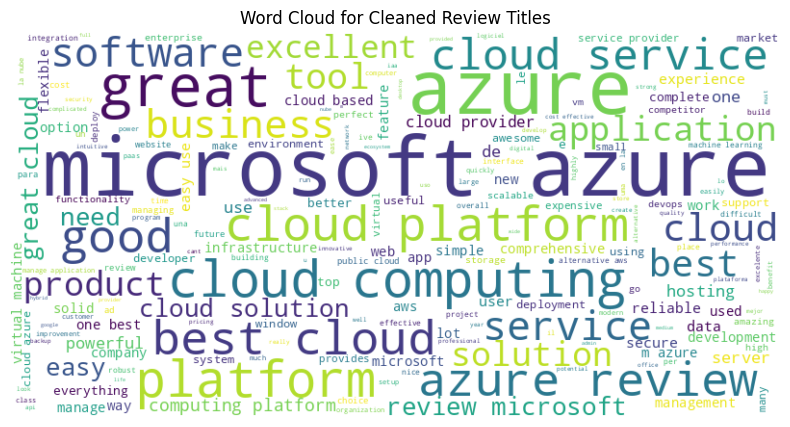

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def generate_word_cloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()

# all cleaned text data
cleaned_title_text = ' '.join(df['Cleaned_Title'])

# Generate word clouds for each
generate_word_cloud(cleaned_title_text, 'Word Cloud for Cleaned Review Titles')


#Feature Extraction


**CountVector / TF-IDF**

* Convert Text to Numerical Data: Transform the cleaned text data into a numerical format that can be used for machine learning models.
* Feature Extraction: Extract the top 100 most frequent words from the text data.
* Analyze Text Data: Understand the structure and content of the text data through the extracted features.
* Understand Vocabulary: Quickly view the size and sample of the vocabulary learned from the text data.
* Inspect Feature Matrix: Verify the transformation of text data into a numerical format suitable for further analysis or modeling.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(max_features=100)  # Limit to 100 features

X_count = count_vec.fit_transform(df['Cleaned_Title'])  # Transform the data
# Print vocabulary size
print('CountVectorizer Vocabulary Size:', len(count_vec.get_feature_names_out()))

# Print sample feature names
print('Sample Feature Names:', count_vec.get_feature_names_out()[:20])

# Print a sample of the feature matrix
print('Sample Output:')
print(X_count.toarray()[:5, :10])  # Adjust indices as needed


CountVectorizer Vocabulary Size: 100
Sample Feature Names: ['ad' 'alternative' 'amazing' 'application' 'awesome' 'aws' 'azure'
 'based' 'best' 'better' 'business' 'choice' 'cloud' 'company'
 'competitor' 'complete' 'comprehensive' 'computing' 'cost' 'could']
Sample Output:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]]


Dimension Reduction


Our initially had a large number of features (based on our CountVectorizer), which might have been very high due to the extensive vocabulary.
Using TruncatedSVD reduced the feature space to 100 components, making it more manageable and potentially highlighting the most important aspects of our text data.

* Dimensionality Reduction:Reduce the number of features while retaining the most important information.
* Efficient Computation: Lower-dimensional data is computationally less expensive to process and analyze.
* Improved Performance: Removing redundant and noisy features can lead to better performance in machine learning models.


In [ ]:
from sklearn.decomposition import TruncatedSVD

# Dimensionality reduction
svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform (X_count)

# Print shape of the reduced matrix
print('Reduced Matrix Shape:', X_reduced.shape)


Reduced Matrix Shape: (1563, 100)


#Clustering KMeans and Visualization
* Clustering: Group similar data points together based on their features.
* Label Data: Assign cluster labels to each data point for further analysis.


In [ ]:
# Perform clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=7, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_reduced)

print(df[['Cleaned_Title', 'Cluster']].head(10))



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


                                       Cleaned_Title  Cluster
0                       one big three cloud provider        3
1  designed help business size manage infrastruct...        1
2                                    microsoft azure        4
3                             unleashing power cloud        3
4                              year experience azure        2
5                            great hybrid enviroment        1
6                embrace power cloud microsoft azure        0
7                      agrxis review microsoft azure        4
8                        solid choice workload cloud        3
9  good cost effective business class cloud platf...        0


* Train-Test Split: Divide the data into training and testing sets to evaluate model performance.
* Model Training: Fit a logistic regression model to the training data.
* Model Evaluation: Assess the model's performance using the test data and a classification report.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Choose one label for your model
# Option 1: Predict Cluster
labels = df['Cluster']

# Option 2: Predict Job Role
# labels = df['job_role']

# Split the data using the single label Series
X_train, X_test, y_train, y_test = train_test_split(X_reduced, labels, test_size=0.3, random_state=0)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00       185
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00       106
           4       1.00      1.00      1.00        68
           5       1.00      1.00      1.00        12
           6       1.00      1.00      1.00        30

    accuracy                           1.00       469
   macro avg       1.00      1.00      1.00       469
weighted avg       1.00      1.00      1.00       469



#PCA
* Visualize Clusters: Provide a visual representation of the document clusters in a 2D space.
* Analyze Clustering: Observe the distribution and separation of clusters.

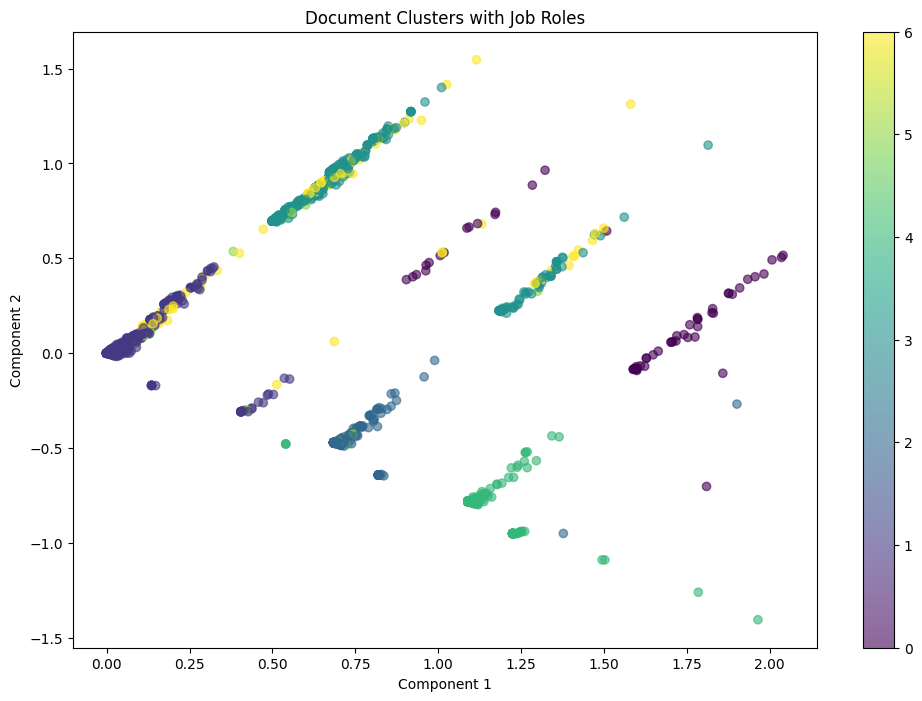

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
# Use the 'Cluster' column from your DataFrame for the color mapping
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Document Clusters with Job Roles')
plt.colorbar(scatter)
plt.show()

#Sentimental Analysis/ Clustering
* Analyze Reviews: Understand how reviews vary across different job roles and clusters.
* Present Insights: Provide a clear and concise summary of reviews for different job roles and clusters.

Job Role: This is the specific role of the individual who wrote the review.

Cluster: This is the cluster number to which the review was assigned.

Reviews with similar content have been grouped into the same cluster.

Cleaned_Title: This is the title of the review, which has been cleaned

In [ ]:
#Display Reviews by Job Role and Cluster
job_role_cluster_reviews = df.groupby(['job_role','Cluster'])['Cleaned_Title'].apply(list) # Group by job role and cluster, selecting the 'Cleaned_Title' column

for (job_role, cluster), reviews in job_role_cluster_reviews.items():
    print(f"\nJob Role: {job_role}, Cluster: {cluster}")
    # Use slicing to display the first few elements of the list
    print(reviews[:4])  # Display up to the first 4 reviews


Job Role: *Star Creator, Cluster: 2
['azure exactly']

Job Role: ., Cluster: 6
['amazing cloud service']

Job Role: 1001-5000 employees, Cluster: 1
['']

Job Role: 11-50 employees, Cluster: 1
['great flexible hosting platform', 'simple cheap maybe need']

Job Role: 11-50 employees, Cluster: 2
['four letter acronym aplenty flaas saas paas iaa azure', 'azure save company lot money hardware purchase']

Job Role: 11-50 employees, Cluster: 5
['powerful tool good price']

Job Role: 501-1000 employees, Cluster: 1
['gettin done']

Job Role: 51-200 employees, Cluster: 1
['ease use', 'user friendly easy use']

Job Role: 51-200 employees, Cluster: 2
['best way write code azure']

Job Role: 51-200 employees, Cluster: 3
['welcome cloud']

Job Role: AC TUARIO, Cluster: 1
['e demasciado útil']

Job Role: ANALISTA, Cluster: 0
['positive experience microsoft azure flexible solid secure cloud platform']

Job Role: AS Consultoria, Cluster: 6
['cloud computing service']

Job Role: AVP, Cluster: 6
['aweso

* Summarize Reviews: Combine reviews within each cluster for a consolidated view.
* Analyze Sentiment: Determine the sentiment of each review to understand overall cluster sentiment.
* Visualize Sentiment Distribution: Use a boxplot to display the range and distribution of sentiment scores across clusters.

# Sentiment analyze of each review
* Categorize Sentiment: Classify each review title into Positive, Neutral, or Negative sentiment categories.
* Enhanced Analysis: Gain deeper insights into the overall sentiment of the review titles.


In [ ]:
from textblob import TextBlob

# Function to get sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Sentiment'] = df['Cleaned_Title'].apply(analyze_sentiment)


Aggregate Sentiment by Job Role
* Sentiment Analysis by Job Role: Understand how different job roles perceive the software based on the sentiment of their reviews.
* Proportion Calculation: Determine the relative proportion of positive and negative sentiments for more nuanced insights.

In [ ]:
# Aggregate sentiment counts by job role
sentiment_summary = df.groupby('job_role')['Sentiment'].value_counts().unstack().fillna(0)

# Calculate proportions if needed
sentiment_summary['Positive_Proportion'] = sentiment_summary['Positive'] / sentiment_summary.sum(axis=1)
sentiment_summary['Negative_Proportion'] = sentiment_summary['Negative'] / sentiment_summary.sum(axis=1)

print(sentiment_summary)


Sentiment            Negative  Neutral  Positive  Positive_Proportion  \
job_role                                                                
*Star Creator             0.0      0.0       1.0                  1.0   
.                         0.0      0.0       1.0                  1.0   
1001-5000 employees       0.0      1.0       0.0                  0.0   
11-50 employees           0.0      2.0       3.0                  0.6   
501-1000 employees        0.0      1.0       0.0                  0.0   
...                       ...      ...       ...                  ...   
team member               0.0      0.0       1.0                  1.0   
ti                        0.0      0.0       1.0                  1.0   
tutor                     0.0      1.0       1.0                  0.5   
web designer              0.0      0.0       1.0                  1.0   
Étudiant                  0.0      1.0       0.0                  0.0   

Sentiment            Negative_Proportion  
job_rol

Performed WordCloud For Review by the job roles
* Visualize Key Words: Create a visual representation of the most frequent words in reviews for a specific job role.
* Insight into Reviews: Highlight common themes and keywords used by reviewers in the specified job role.

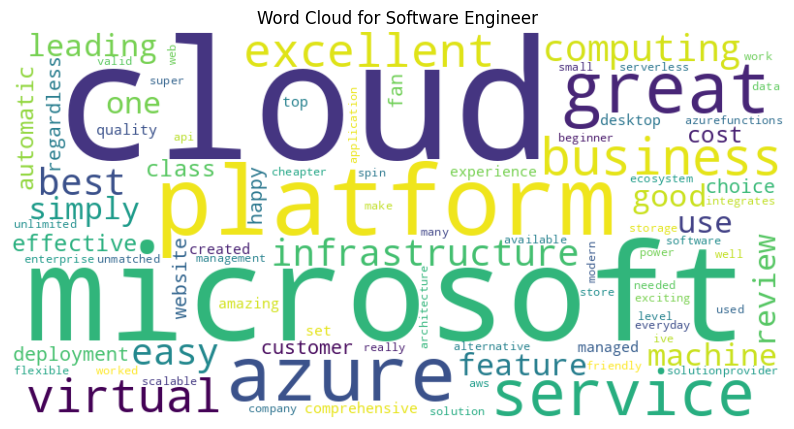

In [ ]:
from wordcloud import WordCloud

# Generate word clouds for a specific job role
job_role = 'Software Engineer'
text = ' '.join(df[df['job_role'] == job_role]['Cleaned_Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for {job_role}')

plt.show()


**Sentiment analyze on pros and cons aggregate by Job Roles**

WordCloud of Pros and Cons
* Visualize Key Words: Create visual representations of the most frequent words in the pros and cons sections of reviews.
* Insight into Feedback: Highlight common themes and keywords mentioned as pros and cons by reviewers.


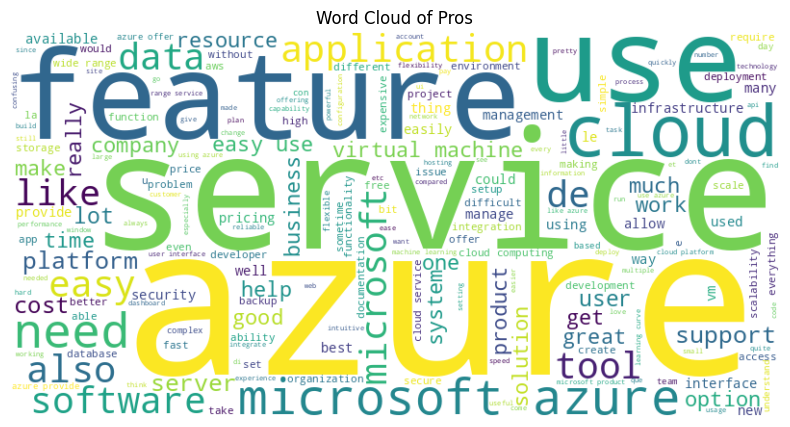

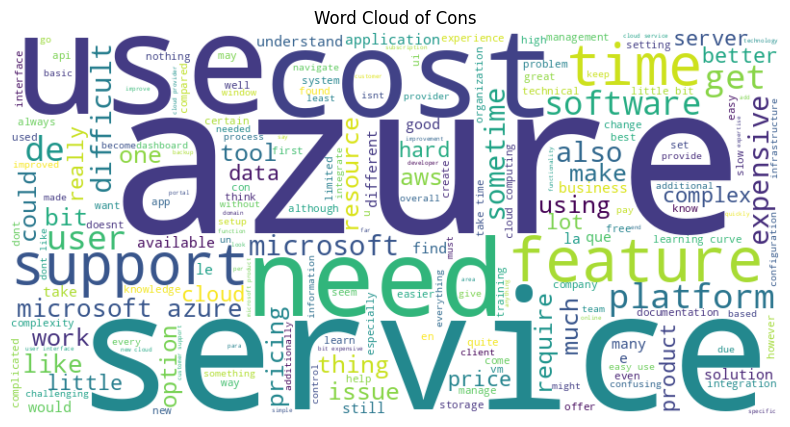

In [ ]:
# Generate word cloud for pros
pros_text = ' '.join(df['Cleaned_Pros'].tolist())
wordcloud_pros = WordCloud(width=800, height=400, background_color='white', stopwords=nltk.corpus.stopwords.words('english')).generate(pros_text)

# Generate word cloud for cons
cons_text = ' '.join(df['Cleaned_Cons'].tolist())
wordcloud_cons = WordCloud(width=800, height=400, background_color='white', stopwords=nltk.corpus.stopwords.words('english')).generate(cons_text)

# Plot the word cloud for pros
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pros, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Pros')
plt.show()

# Plot the word cloud for cons
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_cons, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cons')
plt.show()

Interpretion WordCloud(Pros and Cons)

By examining the word cloud and diagrams of both pros and cons, it's evident that users generally had a positive experience with the product. The most common positive comments highlighted its ease of use, effective backup functions, useful features, manageable costs, and high-quality data. On the other hand, the negative feedback from some job roles pointed out issues such as high costs, limited application options, storage problems, complexity, and difficulties in making changes. This contrast between the pros and cons helps us understand what users appreciate and where there is room for improvement.

* Categorize Sentiment: Classify each review's pros and cons into Positive, Neutral, or Negative sentiment categories.
* Enhanced Analysis: Gain deeper insights into the overall sentiment of the pros and cons in the reviews.

In [ ]:
from textblob import TextBlob

# Function to get sentiment
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Apply sentiment analysis
df['Pros_Sentiment'] = df['Cleaned_Pros'].apply(analyze_sentiment)
df['Cons_Sentiment'] = df['Cleaned_Cons'].apply(analyze_sentiment)


* Sentiment Analysis by Job Role: Understand how different job roles perceive the pros and cons of the software.
* Proportion Calculation: Determine the relative proportion of positive and negative sentiments for more nuanced insights.


In [ ]:
# Aggregate sentiment counts by job role for pros
pros_sentiment_summary = df.groupby('job_role')['Pros_Sentiment'].value_counts().unstack().fillna(0)
# Aggregate sentiment counts by job role for cons
cons_sentiment_summary = df.groupby('job_role')['Cons_Sentiment'].value_counts().unstack().fillna(0)

# Calculate proportions if needed
pros_sentiment_summary['Positive_Proportion'] = pros_sentiment_summary['Positive'] / pros_sentiment_summary.sum(axis=1)
pros_sentiment_summary['Negative_Proportion'] = pros_sentiment_summary['Negative'] / pros_sentiment_summary.sum(axis=1)

cons_sentiment_summary['Positive_Proportion'] = cons_sentiment_summary['Positive'] / cons_sentiment_summary.sum(axis=1)
cons_sentiment_summary['Negative_Proportion'] = cons_sentiment_summary['Negative'] / cons_sentiment_summary.sum(axis=1)

print(pros_sentiment_summary.head(10))
print(cons_sentiment_summary.head(10))


Pros_Sentiment       Negative  Neutral  Positive  Positive_Proportion  \
job_role                                                                
*Star Creator             0.0      0.0       1.0                 1.00   
.                         0.0      0.0       1.0                 1.00   
1001-5000 employees       1.0      0.0       0.0                 0.00   
11-50 employees           1.0      1.0       3.0                 0.60   
501-1000 employees        0.0      0.0       1.0                 1.00   
51-200 employees          1.0      0.0       3.0                 0.75   
AC TUARIO                 0.0      1.0       0.0                 0.00   
ANALISTA                  0.0      0.0       1.0                 1.00   
AS Consultoria            0.0      1.0       0.0                 0.00   
AVP                       0.0      0.0       1.0                 1.00   

Pros_Sentiment       Negative_Proportion  
job_role                                  
*Star Creator                   0.000


* Sentiment Analysis: Use VADER to compute sentiment scores for pros and cons.
* Visualization: Plot histograms to visualize the distribution of sentiment scores.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


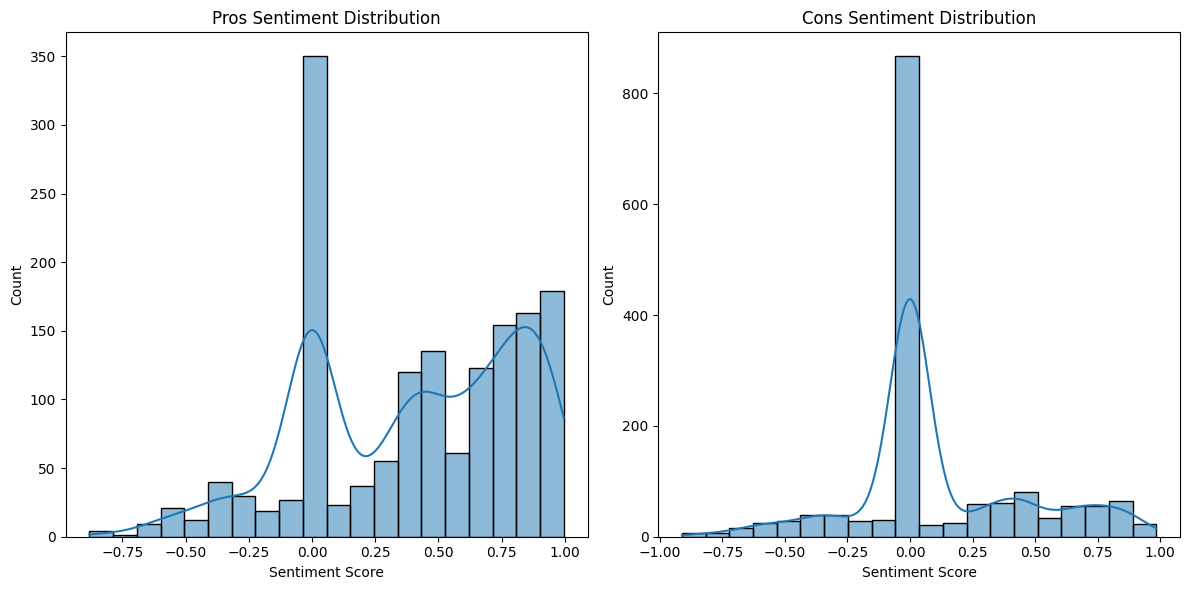

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import seaborn as sns


# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Assuming df['Cleaned_Pros'] and df['Cleaned_Cons'] contain your cleaned pros and cons
# Sentiment Analysis for pros
df['pros_sentiment'] = df['Cleaned_Pros'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Sentiment Analysis for cons
df['cons_sentiment'] = df['Cleaned_Cons'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Visualization
plt.figure(figsize=(12, 6))

# Histogram for pros sentiment
plt.subplot(1, 2, 1)
sns.histplot(df['pros_sentiment'], kde=True, bins=20)
plt.title('Pros Sentiment Distribution')
plt.xlabel('Sentiment Score')

# Histogram for cons sentiment
plt.subplot(1, 2, 2)
sns.histplot(df['cons_sentiment'], kde=True, bins=20)
plt.title('Cons Sentiment Distribution')
plt.xlabel('Sentiment Score')

plt.tight_layout()
plt.show()



#Topic Modeling

In [ ]:
!pip install pyLDAvis
import pandas as pd
import gensim
from gensim import corpora


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.4 MB/s eta 0:00:00


* Topic Modeling: Discover and understand topics within the combined pros and cons text.
* Visualize Topics: Provide an interactive visualization of the topics for better insights.

In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.models import LdaModel # Use LdaModel instead of LdaMulticore
import pyLDAvis
import pyLDAvis.gensim_models

# Combine pros and cons into a single column
df['Combined_Text'] = df['Cleaned_Pros'] + ' ' + df['Cleaned_Cons']

# Prepare data for LDA
texts = df['Combined_Text'].tolist()
tokenized_texts = [text.split() for text in texts]
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Apply LDA with automatic alpha tuning
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=20, alpha='auto') # Changed to LdaModel

# Print topics
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")

# Visualize topics
lda_vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)

Topic: 0 
Words: 0.010*"software" + 0.010*"di" + 0.007*"e" + 0.006*"per" + 0.006*"support" + 0.006*"azure" + 0.005*"use" + 0.005*"time" + 0.005*"sometimes" + 0.005*"la"
Topic: 1 
Words: 0.019*"azure" + 0.017*"microsoft" + 0.013*"product" + 0.013*"cloud" + 0.012*"support" + 0.012*"use" + 0.011*"easy" + 0.009*"like" + 0.009*"server" + 0.008*"software"
Topic: 2 
Words: 0.044*"azure" + 0.020*"service" + 0.016*"cloud" + 0.015*"microsoft" + 0.012*"platform" + 0.011*"use" + 0.010*"data" + 0.009*"need" + 0.009*"user" + 0.009*"application"
Topic: 3 
Words: 0.051*"de" + 0.018*"la" + 0.016*"que" + 0.014*"le" + 0.013*"e" + 0.011*"en" + 0.010*"et" + 0.008*"para" + 0.007*"azure" + 0.006*"un"
Topic: 4 
Words: 0.021*"azure" + 0.017*"service" + 0.011*"use" + 0.011*"time" + 0.010*"feature" + 0.010*"like" + 0.010*"easy" + 0.008*"bit" + 0.008*"lot" + 0.007*"server"


Interpretion of topics
1. Azure cloud services and users experience
2. User service needs, software features and difficulties
3. Ease of use in azure and application interface
4. Includes multilingual reviews.















* Model Evaluation: Perplexity is used to evaluate the LDA model's performance. Lower perplexity indicates better model performance.

In [ ]:
# Calculate log perplexity
log_perplexity = lda_model.log_perplexity(corpus)

# Convert log perplexity to perplexity
perplexity = np.exp(-log_perplexity)

print(f'Perplexity: {perplexity}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Perplexity: 1465.0053971639713


* Model Evaluation: Coherence score is used to evaluate the interpretability and quality of topics generated by the LDA model.
* Better Topics: Higher coherence score indicates more coherent and interpretable topics.

In [ ]:
# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel # Import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score: 0.5516470870879538


#NMF


* Understand Topics: Identify the main themes and topics in the text data.
* Evaluate Topics: Use coherence score to assess the quality and interpretability of the topics.

In [ ]:
from sklearn.decomposition import NMF
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
import gensim
from sklearn.feature_extraction.text import TfidfVectorizer # Import TfidfVectorizer

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')

# Assuming df is your DataFrame with 'Combined_Text'
# Drop rows with NaN values in 'Combined_Text' column
df = df.dropna(subset=['Combined_Text'])

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Adjust stop words as needed
X_tfidf = vectorizer.fit_transform(df['Combined_Text'])

# Fit the NMF model
n_components = 5  # Number of topics
nmf = NMF(n_components=n_components, random_state=42)
W = nmf.fit_transform(X_tfidf)
H = nmf.components_

# Print the topics
def print_topics(model, vectorizer, top_n=10):
    words = vectorizer.get_feature_names_out()
    for idx, topic in enumerate(model.components_):
        print(f"Topic {idx}:")
        print([words[i] for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(nmf, vectorizer)

# Tokenize the combined text
tokenized_texts = [word_tokenize(text.lower()) for text in df['Combined_Text']]

# Create a Gensim dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Convert NMF topics to a format suitable for Gensim
def nmf_topics_to_gensim(topics, feature_names):
    gensim_topics = []
    for topic in topics:
        gensim_topic = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
        gensim_topics.append(gensim_topic)
    return gensim_topics

nmf_topics = nmf_topics_to_gensim(H, vectorizer.get_feature_names_out())

# Compute coherence score for NMF
coherence_model_nmf = CoherenceModel(topics=nmf_topics, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model_nmf.get_coherence()
print(f"Coherence Score: {coherence_score}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 0:
['azure', 'microsoft', 'platform', 'cloud', 'data', 'need', 'business', 'application', 'resource', 'feature']
Topic 1:
['use', 'easy', 'software', 'like', 'product', 'great', 'dont', 'learn', 'good', 'using']
Topic 2:
['service', 'support', 'cloud', 'like', 'aws', 'provider', 'amazon', 'customer', 'option', 'lot']
Topic 3:
['cost', 'high', 'expensive', 'price', 'machine', 'compared', 'virtual', 'server', 'bit', 'performance']
Topic 4:
['time', 'user', 'bit', 'interface', 'difficult', 'support', 'feature', 'hard', 'little', 'learning']
Coherence Score: 0.5794522790444467


Topic Interpretion

1. Microsoft Azure and cloud computing.
2. Usability and user experience with software.
3.  Cloud service providers and customer support, with a focus on AWS.
4. Cost and pricing of virtual servers or computing resources.
5.  User interface and experience challenges.




* Data Visualization: Provide a visual representation of the number of reviews mentioning pros and cons.
* Insight into Reviews: Understand the distribution of reviews mentioning pros and cons.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


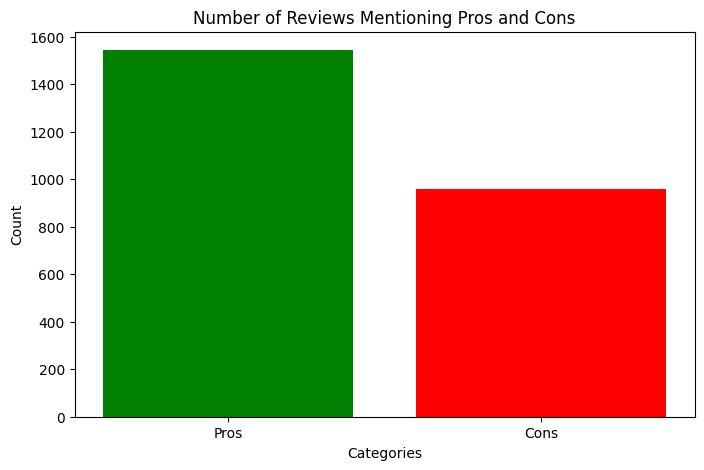

In [ ]:


# Extracting the data
pros_counts = df['Pros'].notnull().sum()
cons_counts = df['Cons'].notnull().sum()

# Data for plotting
labels = ['Pros', 'Cons']
values = [pros_counts, cons_counts]

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Number of Reviews Mentioning Pros and Cons')
plt.show()


* Data Transformation: Convert and group data for analysis.
* Data Visualization: Create a bar chart to visually represent the top 5 job roles by average rating.
* User-Friendly Display: Print the top 5 results in a clear and readable format.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


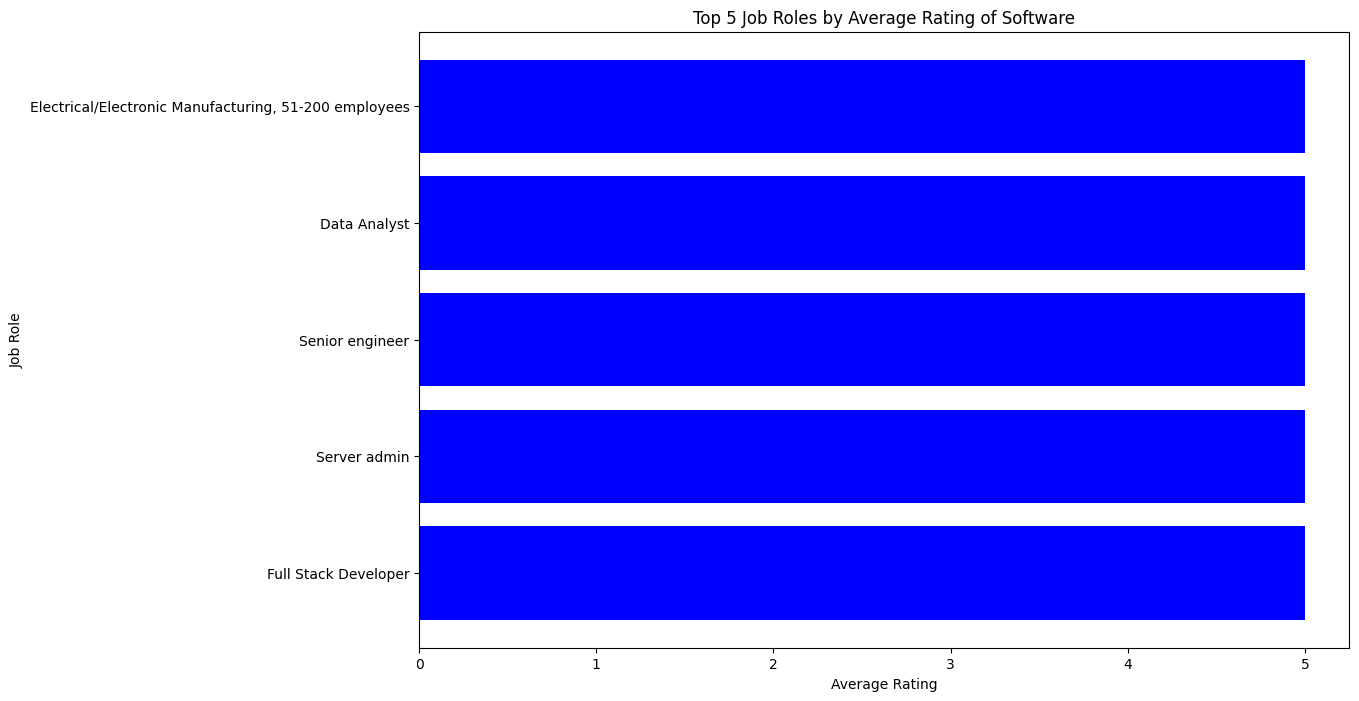


Top 5 Job Roles by Average Rating of Software:
Electrical/Electronic Manufacturing, 51-200 employees: 5.00
Data Analyst: 5.00
Senior engineer: 5.00
Server admin: 5.00
Full Stack Developer: 5.00


In [ ]:

# Ensure that the 'Rating Overall' column is numeric
df['Rating Overall'] = pd.to_numeric(df['Rating Overall'], errors='coerce')

# Group by 'Job Role' and calculate the average rating
average_ratings = df.groupby('Job Role')['Rating Overall'].mean().reset_index()

# Sort the results by average rating in descending order
average_ratings = average_ratings.sort_values(by='Rating Overall', ascending=False)

# Get the top 5 job roles with the highest average ratings
top_5_average_ratings = average_ratings.head(5)

# Plotting the results
plt.figure(figsize=(12, 8))
plt.barh(top_5_average_ratings['Job Role'], top_5_average_ratings['Rating Overall'], color='blue')
plt.xlabel('Average Rating')
plt.ylabel('Job Role')
plt.title('Top 5 Job Roles by Average Rating of Software')
plt.gca().invert_yaxis()  # To display the highest rating at the top
plt.show()

# Display the top 5 results in a user-friendly text format
print("\nTop 5 Job Roles by Average Rating of Software:")
for index, row in top_5_average_ratings.iterrows():
    print(f"{row['Job Role']}: {row['Rating Overall']:.2f}")


* Text Preprocessing: Clean and prepare the 'Cons' text data for analysis.
* Topic Modeling: Discover and understand the main topics in the 'Cons' data using LDA.

In [ ]:

# Text preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    tokens = word_tokenize(text)
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return tokens

# Apply preprocessing to the 'Cons' column
df['Cleaned_Cons'] = df['Cons'].apply(lambda x: preprocess_text(str(x)))

# Create a dictionary and corpus for LDA
texts = df['Cleaned_Cons'].tolist()
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Display the top topics
top_topics = lda_model.print_topics(num_words=10)
print("Top Topics in Cons:")
for topic_num, topic in top_topics:
    print(f"Topic {topic_num}: {topic}")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top Topics in Cons:
Topic 0: 0.019*"bit" + 0.018*"azure" + 0.014*"time" + 0.013*"software" + 0.012*"microsoft" + 0.010*"user" + 0.009*"use" + 0.009*"like" + 0.008*"expensive" + 0.008*"difficult"
Topic 1: 0.216*"nan" + 0.009*"de" + 0.008*"e" + 0.005*"la" + 0.005*"work" + 0.004*"que" + 0.004*"need" + 0.004*"sometimes" + 0.004*"get" + 0.004*"un"
Topic 2: 0.032*"azure" + 0.022*"service" + 0.014*"cloud" + 0.012*"need" + 0.011*"cost" + 0.011*"user" + 0.010*"platform" + 0.009*"may" + 0.009*"support" + 0.008*"microsoft"
Topic 3: 0.017*"azure" + 0.012*"cloud" + 0.012*"use" + 0.011*"service" + 0.009*"time" + 0.008*"cost" + 0.007*"need" + 0.007*"also" + 0.007*"find" + 0.006*"feature"
Topic 4: 0.016*"azure" + 0.012*"de" + 0.012*"microsoft" + 0.009*"time" + 0.009*"support" + 0.008*"la" + 0.007*"le" + 0.007*"issue" + 0.006*"user" + 0.006*"much"


Topic 0: Usability and Cost

Topic 1: Language Barrier and Accessibility

Topic 2: Service Quality and Cost

Topic 3: Usability and Features

Topic 4: Language and Support